In [12]:
np.std([1, 5, 10, 3, 8, 12, 4])

3.6811710647786073

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
to_drop = ['homepage', 'tagline', 'keywords', 'production_companies', 'id', 'imdb_id', 'popularity', 'vote_count',
          'vote_average', 'budget', 'revenue'] #def want to get rid of homepage, tagline, keywords, production companies as
df.drop(columns = to_drop, inplace=True)       #they have 10% or more missing values. other items are items one can't control
df.head()                                      #with production. kept adjust budget/rev to adjust for inflation

,original_title,cast,director,overview,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [5]:
df.duplicated().sum() #I got an answer of just 1.
df.drop_duplicates(inplace=True)
df.shape

(10865, 10)

In [6]:
rows_with_na = df[df.isna().sum(axis=1) == 1]
rows_with_na.revenue_adj.value_counts() #Only 125 of 10865 movies have NaN values. Confident to drop them after seeing most of
df.dropna(inplace=True)                 #them(119/125) are missing revenue_adjust aka my dependent variable. Largest one was 31mill

In [7]:
df.isna().sum().sum() #Good!no more NaN's!

0

In [8]:
df.info() #I see can make release_date into datetime.  
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10729 non-null  object 
 1   cast            10729 non-null  object 
 2   director        10729 non-null  object 
 3   overview        10729 non-null  object 
 4   runtime         10729 non-null  int64  
 5   genres          10729 non-null  object 
 6   release_date    10729 non-null  object 
 7   release_year    10729 non-null  int64  
 8   budget_adj      10729 non-null  float64
 9   revenue_adj     10729 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 922.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  10729 non-null  object        
 1   cast            1

In [9]:
no_money = df[df['revenue_adj'] == 0].index #whole point of this is to understand what movies make more money. 
df.drop(index=no_money, inplace=True) #Dropping those with no money made(could be hard to report foreign filsms, and some may have been made for tv)
df.shape #dropped half of my movies. Scared me at first, but still have 4853 and I mostly am concerned about the money these films make

(4843, 10)

In [10]:
no_budget = df[df.budget_adj == 0].index #994 movies with no budget numbers, which is not realistic. all movies cost money to make
df.drop(index=no_budget, inplace=True)
df.shape #left with  3849 movies. 10 columns

(3849, 10)

In [11]:
df = df[df.budget_adj >= 1e5] #Adjusted for more realistic budgets. When I tried plotting, I finally noticed some low 'budgets'
                              #which resulted in some films having astronomical returns on investments, which a google search
                              #disproved.
        

In [12]:
(df.original_title.value_counts() > 1).sum() #uh-oh! Some movie titles are repeats. Could be coincidences as well as remakes

44

In [13]:
duplicated_titles = df[df.original_title.duplicated(keep=False) == True]
((duplicated_titles.groupby('original_title')['release_year'].count()) < 2).sum()  #Now I know no repeated titles were made in same year so splitting by movie
                                                                                    #and year ensures better analysis

0

One thing I am curious about is the rate on investment. Adding a column called ROI, which is just revenue divided by budget

In [14]:
df['ROI'] = df.revenue_adj/df.budget_adj
df.head()

,original_title,cast,director,overview,runtime,genres,release_date,release_year,budget_adj,revenue_adj,ROI
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09,10.090192
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08,2.522909
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08,2.683984
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09,10.340891
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09,7.927628


In [15]:
df.cast = df.cast.map(lambda x: x.split('|'))           #splitting up the cast, genre, and director columns as they are groups
df.genres = df.genres.map(lambda x: x.split('|'))       #want to do this as certain actors, directors, genres may have more
df.director = df.director.map(lambda x: x.split('|'))   #effect on revenues. First must turn them from long strings to lists
df.head()

,original_title,cast,director,overview,runtime,genres,release_date,release_year,budget_adj,revenue_adj,ROI
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,2015,1.379999e+08,1.392446e+09,10.090192
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,2015,1.379999e+08,3.481613e+08,2.522909
2,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2015,1.012000e+08,2.716190e+08,2.683984
3,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,2015,1.839999e+08,1.902723e+09,10.340891
4,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",2015-04-01,2015,1.747999e+08,1.385749e+09,7.927628


In [22]:
columns_to_split = ['cast', 'director', 'genres'] #this is just so I can see the ones I need to split up

df_split_cast = df.groupby(['original_title', 'release_year', 'revenue_adj', 'ROI']).cast.apply(lambda x: pd.DataFrame(x.values[0])).reset_index()
df_split_dir = df.groupby(['original_title', 'release_year', 'revenue_adj', 'ROI']).director.apply(lambda x: pd.DataFrame(x.values[0])).reset_index()
df_split_genres = df.groupby(['original_title', 'release_year', 'revenue_adj', 'ROI']).genres.apply(lambda x: pd.DataFrame(x.values[0])).reset_index()
#here I grouped by title, year, and revenue. The first two are indicators(no two movies with same title were made in same yr)
#needed my revenue column as well as that is my independent variable here. From there, I apply create a Df of each element of my
#cast, director, and genres columns and took just the first row as apply function keeps looping through the list taking out the first value.
#This separates each individual unit(each actor, each director, or each genre) into its own row within the larger dataframe. 
#Reset_index just takes out the multi-hireachal chain of grouping. But I see it creates a column "level_4" which acts like an index
#Time to remove it! Also have to rename my final column in each new Df
df_split_cast.drop(columns = 'level_4', inplace=True)
df_split_dir.drop(columns = 'level_4', inplace=True)
df_split_genres.drop(columns = 'level_4', inplace=True)

df_split_cast.rename(columns={0 : 'cast'}, inplace=True)
df_split_dir.rename(columns={0 : 'director'}, inplace=True)
df_split_genres.rename(columns={0 : 'genre'}, inplace=True)

In [23]:
df_split_cast.head()

,original_title,release_year,revenue_adj,ROI,cast
0,(500) Days of Summer,2009,6.171861e+07,8.096365,Joseph Gordon-Levitt
1,(500) Days of Summer,2009,6.171861e+07,8.096365,Zooey Deschanel
2,(500) Days of Summer,2009,6.171861e+07,8.096365,ChloÃ« Grace Moretz
3,(500) Days of Summer,2009,6.171861e+07,8.096365,Geoffrey Arend
4,(500) Days of Summer,2009,6.171861e+07,8.096365,Matthew Gray Gubler


Who is the most successful director by average movie revenue? average ROI?

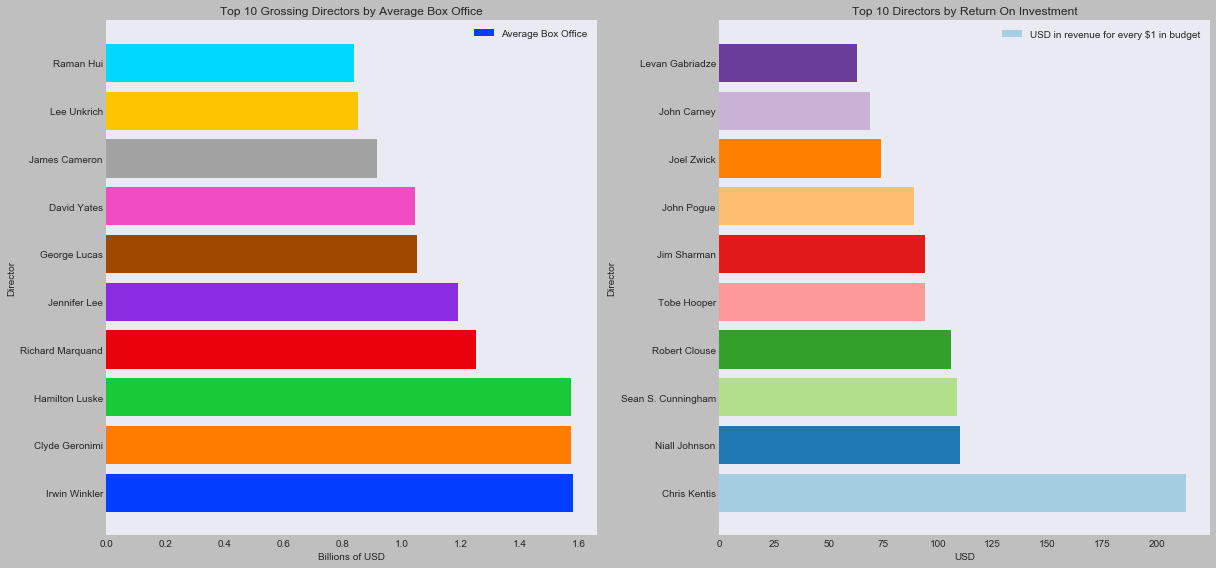

In [27]:
best_rev_dir = df_split_dir.groupby('director').revenue_adj.mean().sort_values(ascending=False)
best_roi_dir = df_split_dir.groupby('director').ROI.mean().sort_values(ascending=False)

fig = plt.figure(figsize=(17,8))
style.use('seaborn-dark')

#plot 1. Best 10 Directors by Revenue
plt.subplot(1, 2, 1)
c = sns.color_palette(palette='bright', n_colors=10)
l = 'Average Box Office'
plt.barh(best_rev_dir[:10].index, best_rev_dir[:10]/1e9, label=l, color=c); #divide by 1billion to get rid of '1e9' in graph
plt.legend()
plt.title('Top 10 Grossing Directors by Average Box Office')
plt.xlabel('Billions of USD')
plt.ylabel('Director');

#plot 2. Best 10 Directors by ROI
plt.subplot(1, 2, 2)
c = sns.color_palette(palette='Paired', n_colors=10)
l = 'USD in revenue for every $1 in budget'
plt.barh(best_roi_dir[:10].index, best_roi_dir[:10], label=l, color=c); #just want first 10 for better presentation
plt.legend()
plt.title('Top 10 Directors by Return On Investment')
plt.xlabel('USD')
plt.ylabel('Director')
plt.tight_layout();

How have movie revenues change through the years? ROI?

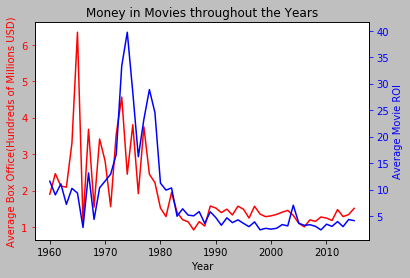

In [24]:
groupedby_year = df.groupby('release_year')
years = groupedby_year.mean().index
revenue = groupedby_year.mean().revenue_adj
roi = groupedby_year.mean().ROI

style.use('grayscale')

fig, ax1 = plt.subplots()
plt.title('Money in Movies throughout the Years')
ax1.plot(years, revenue/1e8, color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Box Office(Hundreds of Millions USD)', color='r')
ax1.tick_params(axis='y', colors='r' )
ax2 = ax1.twinx()

ax2.plot(years, roi, color='b')
ax2.set_ylabel('Average Movie ROI', color='b')
ax2.tick_params(axis='y', colors='b');

Observation: Here, we can see ROI and revenue appear to have a strong correlation. It makes sense as ROI is just the budget/revenue, but it would appear that Hollywood studios did a good job giving money to projects that would go on to be successful. We also see both revenue and ROI have been trending downward since spiking in the 1970's. The spike would make sense as that was the decade of some of the biggest blockbusters that many people all over the world are familiar with, such as Jaws, Star Wars franchise, Exorcist, and Halloween(was most successful independent film for a few decades). Why numbers since the 1970's are lower than they were in the 60s? That would require more exploring and analysis. 

What genres of movies were they making in the 1970s? how does it compared to the mix of movies since?

In [25]:
decade_70s = list(range(1970,1980))
df_1970s = df_split_genres.query('release_year in @decade_70s')
#Df of movies in 1970s, using my df where I had split the genres separately as the basis. Using this temporarily just
#to get more popular genres of that decade.

most_popular70s_genres = df_1970s.copy().genre.value_counts(normalize=True)[:8]
best_4_70s_genres = list(most_popular70s_genres[most_popular70s_genres > .0882].index) 
#Used genres that made up at least 8.82% of all movies since there were 17 genres, which divided evenly is 5.88.
#8.82 is 50% larger, therefore those 4 genres to be more significant of a movie genre.

df_split_genres.replace(best_4_70s_genres, 'top_70s_genre', inplace=True)
#replaced any genre within the best_4_70s_genres list with the string 'top_70s_genre'

films_per_yr = df_split_genres.groupby('release_year').ROI.count()
genres_per_yr = df_split_genres.groupby(['release_year', 'genre']).ROI.count()/films_per_yr
#using ROI as an arbitrary holder for my count, films_per_yr calculates films made per yr
#genres_per_yr is the proportion each genre's makeup in the films produced each yr

years = genres_per_yr.reset_index()['release_year']
how_many_repeats = years.value_counts(sort=False)
#this resetting of index gives me an index with the year repeating once for every film produced. 
#used the value counts so I can use those values to match up the lengths of my different Df's and Series.

genres_per_yr = pd.DataFrame(genres_per_yr.reset_index())
ratio_70s_genre = genres_per_yr.loc[genres_per_yr.genre == 'top_70s_genre'].iloc[:,-1]
ratio_70s_genre = np.repeat(ratio_70s_genre, how_many_repeats)
#turned genres_per_yr into Df to better located my ratios of 70s genres for each yr. Using np.repeat function so it
#has the required length for plotting against my years. In hindsight, my program may run faster if I made the bigger Df's
#smaller instead of the other way around. But this was was easier for me personally. 

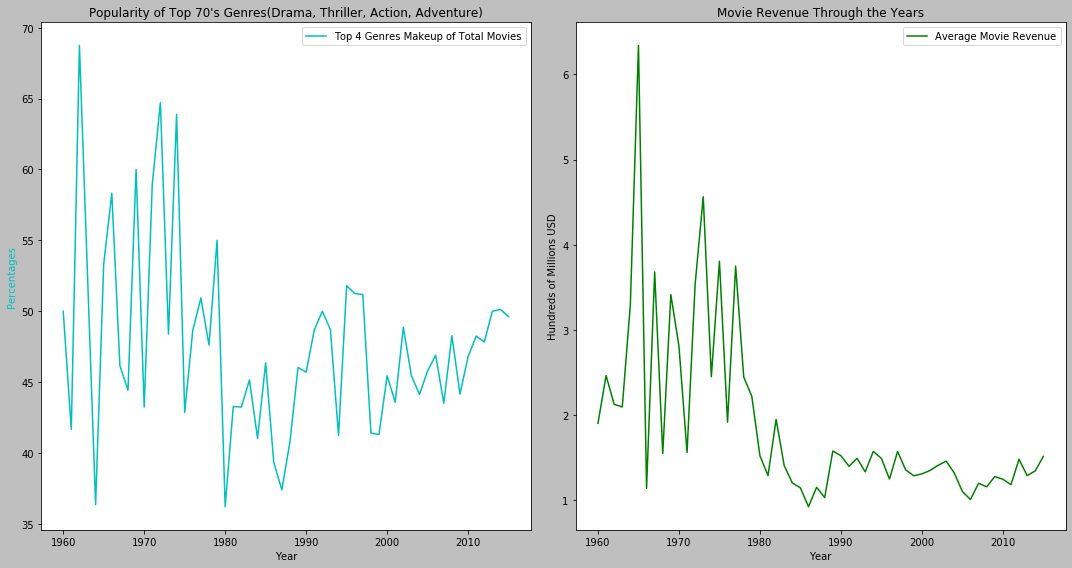

In [26]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
l = 'Top 4 Genres Makeup of Total Movies'
plt.plot(years, round(ratio_70s_genre*100, 2), color='c', label=l)
plt.title('Popularity of Top 70\'s Genres(Drama, Thriller, Action, Adventure)')
plt.xlabel('Year')
plt.ylabel('Percentages', color='c')
plt.legend()

plt.subplot(1, 2, 2)
l = 'Average Movie Revenue'
plt.plot(years, np.repeat((revenue/1e8), how_many_repeats), color='g', label=l)
plt.title('Movie Revenue Through the Years')
plt.xlabel('Year')
plt.ylabel('Hundreds of Millions USD')
plt.legend()
plt.tight_layout();